In [1]:
!unzip babuino/babuino.zip -d babuino
!unzip jirafa/jirafa.zip -d jirafa

unzip:  cannot find or open babuino/babuino.zip, babuino/babuino.zip.zip or babuino/babuino.zip.ZIP.
unzip:  cannot find or open jirafa/jirafa.zip, jirafa/jirafa.zip.zip or jirafa/jirafa.zip.ZIP.


In [2]:
!rm babuino/babuino.zip
!rm jirafa/jirafa.zip

rm: cannot remove 'babuino/babuino.zip': No such file or directory
rm: cannot remove 'jirafa/jirafa.zip': No such file or directory


In [3]:
!mkdir dataset
!cp -r babuino/babuino dataset
!cp -r jirafa/jirafa dataset




mkdir: cannot create directory ‘dataset’: File exists


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=10. ,width_shift_range=0.15, height_shift_range=0.15, shear_range=5,
    zoom_range=[0.7,1.3],validation_split=0.2
)

datagen_train=datagen.flow_from_directory("/content/dataset",
                                          target_size=(224,224),
                                          batch_size=32,shuffle=True,
                                          subset="training"
                                          )

datagen_test=datagen.flow_from_directory("/content/dataset",
                                          target_size=(224,224),
                                          batch_size=32,shuffle=True,
                                          subset="validation"
                                          )


Found 258 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


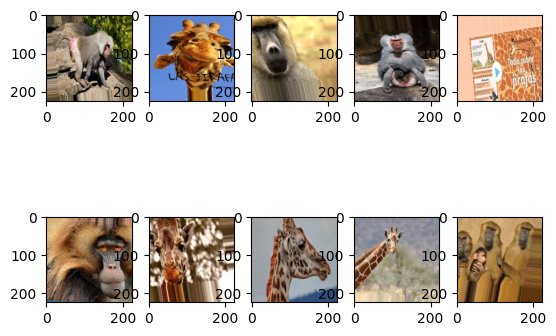

In [5]:
import matplotlib.pyplot as plt

for images,tags in datagen_train:
  for i in range(10):
    plt.subplot(2 ,5, i+1)
    plt.imshow(images[i])
  break

In [6]:
import tensorflow as tf
import tensorflow_hub as tfh

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = tfh.KerasLayer(url,input_shape=(224,224,3))

In [7]:
#freezing layers
mobilenetv2.trainable = False

In [8]:
model = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(2,activation="softmax")
])

In [9]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
epochs = 20
train = model.fit(
    datagen_train, epochs=epochs, batch_size=32,validation_data=datagen_test

)

Epoch 1/20
9/9 [==============================] - 26s 2s/step - loss: 0.6045 - accuracy: 0.6434 - val_loss: 0.2523 - val_accuracy: 0.8594
Epoch 2/20
9/9 [==============================] - 17s 2s/step - loss: 0.1952 - accuracy: 0.9341 - val_loss: 0.1161 - val_accuracy: 0.9688
Epoch 3/20
9/9 [==============================] - 18s 2s/step - loss: 0.0957 - accuracy: 0.9767 - val_loss: 0.1166 - val_accuracy: 0.9531
Epoch 4/20
9/9 [==============================] - 27s 3s/step - loss: 0.0685 - accuracy: 0.9845 - val_loss: 0.0591 - val_accuracy: 0.9844
Epoch 5/20
9/9 [==============================] - 32s 3s/step - loss: 0.0694 - accuracy: 0.9729 - val_loss: 0.0724 - val_accuracy: 0.9688
Epoch 6/20
9/9 [==============================] - 23s 3s/step - loss: 0.0468 - accuracy: 0.9922 - val_loss: 0.0479 - val_accuracy: 0.9844
Epoch 7/20
9/9 [==============================] - 34s 4s/step - loss: 0.0515 - accuracy: 0.9922 - val_loss: 0.1121 - val_accuracy: 0.9688
Epoch 8/20
9/9 [==================

In [ ]:
from PIL import Image
import cv2

def category(rute):
  img = Image.open(rute)
  img = img.convert("RGB")
  img = np.array(img).astype(float)/255

  img = cv2.resize(img,(224,224))
  predict = model.predict(img.reshape(-1,224,224,3))
  return np.argmax(predict[0],axis=-1)